In [ ]:
!pip install pandas


In [33]:
# Importing packages needed
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [34]:
# Reading data into dataframes
Kayaking=pd.read_excel(r"V02Max_Combined.xlsx",sheet_name=0)
Athletes=pd.read_excel(r"V02Max_Combined.xlsx",sheet_name=1)
Triathlon=pd.read_excel(r"V02Max_Combined.xlsx",sheet_name=2)
Fencing=pd.read_excel(r"V02Max_Combined.xlsx",sheet_name=3)

## 1)Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file.

In [35]:
import numpy as np
import pandas as pd
df=[Kayaking,Triathlon,Fencing]
Merged_df=pd.merge(Kayaking,Triathlon,how='outer').merge(Fencing,how='outer')
# Write the final dataframe to an Excel file
Merged_df.to_excel("MergedV02.xlsx", index=False)
print("Merged Dataframe saved to excel successfully")

Merged Dataframe saved to excel successfully


In [36]:
Merged_df

,ID,time,RR,VO2,power
0,1,-130.840,672.0,0.302008,0
1,1,-130.168,672.0,0.302008,0
2,1,-129.536,632.0,0.301336,0
3,1,-128.824,712.0,0.301336,0
4,1,-127.948,876.0,0.301336,0
...,...,...,...,...,...
52057,18,947.288,536.0,0.507071,0
52058,18,947.816,528.0,0.507071,0
52059,18,948.344,528.0,0.507071,0
52060,18,948.884,540.0,0.507071,0


## 2)Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly

## 3)What was the average time each tested lasted excluding warm up for all athletes?

## 4)Athletes from which sport had the highest average cardiorespiratory fitness in terms of HRV?

## 5)What was the average time each test lasted (including warm up) for all athletes?

## 6)What was the most common  wattage (above 0) achieved by participants and for how many seconds (average time)? You may choose to show averages based on any one/all sports. 

## 7)Create a correlation matrix to show the relationship between HR, BMI and sport.

## 8)What are the names of the kayaking athletes?

## 9)What was the average HRV of the triathletes?

## 10)How long was athlete 12 in HR Zone 5?

## 11)Create any 3d plot using any data. Values do not have to be from the dataset given. 

## 12)What were the Highest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

## 13)Calculate the year of birth of each athlete and store it as a column in the tables.

## 14)What were the lowest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

## 15)"Assign 1 of the following 5 heart rate zones for every record for all sports and athletes and add this as a column to every table:
### Zone 1 (recovery/easy)       <100 HR max
### Zone 2 (aerobic/base)        100-120 HR max
### Zone 3 (tempo)        120-135 HR max
### Zone 4 (lactate threshold)        135-155 HR max
### Zone 5 (anaerobic)        155+ HR max and above"

## 16)Calculate the BMI of every athlete and display it as a list.

## 17)What is the maximum ventilatory threshold for triathletes.

In [17]:
triathlets_df=Athletes[Athletes['sport']=='triathlon']
ven_thresh_max=triathlets_df['p_vt2'].max()
print("The maximum ventilatory threshold for triathletes is:",ven_thresh_max)

The maximum ventilatory threshold for triathletes is: 168


## 18)Display the number of athletes in every sport against the name of the sport.

In [11]:
count_of_athletes=Athletes['sport'].value_counts()
print("No of athletes in every sport is: ",count_of_athletes)

No of athletes in every sport is:  sport
fencing      10
kayak         6
triathlon     2
Name: count, dtype: int64


## 19)Display a bar chart showing the average V02 Max by sport.

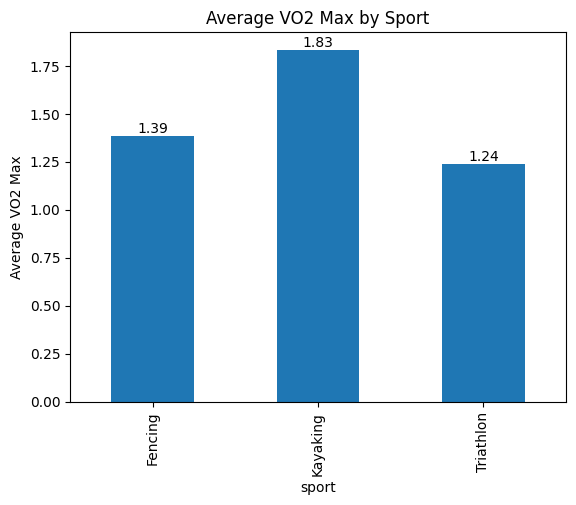

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
# Adding'sport' column to each DataFrame
Kayaking['sport'] = 'Kayaking'
Triathlon['sport'] = 'Triathlon'
Fencing['sport'] = 'Fencing'
# Concatenating the data frames
df = pd.concat([Kayaking[['id', 'vo2', 'sport']],
                Triathlon[['id', 'vo2', 'sport']],
                Fencing[['id', 'vo2', 'sport']]],
                ignore_index=True)
# Calculating average VO2 max values by sport using groupby and agg
avg_vo2_max_by_sport = df.groupby('sport')['vo2'].agg('mean').reset_index()
# Bar chart
a = avg_vo2_max_by_sport.plot(kind='bar', x='sport', y='vo2', title='Average VO2 Max by Sport', legend=False)
for i in a.patches:
    a.annotate(f'{i.get_height():.2f}',
                (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')
plt.ylabel('Average VO2 Max')
plt.show()

## 20)Analyze the trend of HR at the start of the test vs the middle and the end.What is the overall trend? 

## 21)Display a pie chart of number of athletes by sport.

No of athletes in every sport is:
 sport
fencing      10
kayak         6
triathlon     2
Name: count, dtype: int64


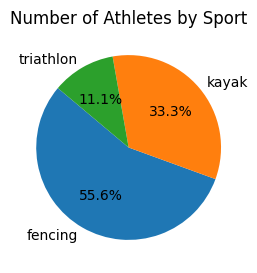

In [10]:
# Counting the number of athletes by sport
count_of_athletes = Athletes['sport'].value_counts()

# Displaying the count
print("No of athletes in every sport is:\n", count_of_athletes)

# Plotting the pie chart
plt.figure(figsize=(5, 3))
plt.pie(count_of_athletes, labels=count_of_athletes.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Athletes by Sport')
plt.show()

## 22)Using any 10 HR values print even if the value is an even number and odd if its an odd number

## 23)Which heart rate zone did most participants spend the longest duration of time in?

## 24)Store athlete name and sport in a dictionary as a pair of values.

In [19]:
# Create the dictionary with athlete names as keys and sport as values
athlete_sport_dict = dict(zip(Athletes['first name'] + ' ' + Athletes['last name'], Athletes['sport']))

print(athlete_sport_dict)


{'Olivia Martinez': 'fencing', 'Ethan Reynolds': 'fencing', 'Jackson Harper': 'fencing', 'Liam Sanchez': 'fencing', 'Ava Thompson': 'fencing', 'Sophia Rodriguez': 'fencing', 'Grace Simmons': 'fencing', 'Aiden Bennett': 'fencing', 'Chloe Price': 'fencing', 'Lily Jordan': 'fencing', 'Isabella Griffin': 'kayak', 'Caleb Dixon': 'kayak', 'Mia Carpenter': 'kayak', 'Harper Mitchell': 'kayak', 'Mason Wallace': 'kayak', 'Logan Anderson': 'kayak', 'Lucas Foster': 'triathlon', 'Owen Myers': 'triathlon'}


## 25)Using arrays and loops, find the count of athletes based on gender.

In [20]:
# Initializing the counts with 0
male_count=0
female_count=0
# Checking the gender values for each row
for str in Athletes['gender']:
 if str=="Male":
  male_count+=1
 elif str=="Female":
  female_count+=1
print("Male athletes count is: ",male_count)
print("Female athletes count is: ",female_count)

Male athletes count is:  8
Female athletes count is:  10


## 26)Create a sankey diagram to show the groups of race within each sport

## 27)Calculate the average heart rate for every minute for every athlete and add it as a column in the same dataframe.

## 28)Print athlete 15s Age and Pvt1 using the format() function

In [21]:
df=Athletes[Athletes['id']==15]
print("Athlete id {}'s age is {} and Pvt1 is {}".format(df['id'].values[0],df['age'].values[0],df['p_vt1'].values[0]))

Athlete id 15's age is 13 and Pvt1 is 125


## 29)On average how long was each participants’ warm up?

## 30)Display the HRV of each athlete?

## 31)Return the count of athletes for any sport that the user inputs.

In [22]:
# Asking the user to enter input and converting into lower case
user_input=input("Enter any sport name: ").strip().lower()
count_of_athletes=len(Athletes[Athletes['sport'].str.lower()==user_input])
print(f'No of athletes in sport "{user_input}" is:{count_of_athletes}')

Enter any sport name:  Fencing


No of athletes in sport "fencing" is:10


## 32)Insert the name of every athlete into an array and display the length of that array.

In [23]:
names_list = []
# Using for loop for the Athletes list 
for i,row in Athletes.iterrows():
    first_name =row['first name']
    last_name =row['last name']
    full_name = f"{first_name}{last_name}".strip()
    names_list.append(full_name)
# The full name list is
print(names_list)
# Display the length of the array
print("Athletes count is: ", len(names_list))

['OliviaMartinez', 'EthanReynolds', 'JacksonHarper', 'LiamSanchez', 'AvaThompson', 'SophiaRodriguez', 'GraceSimmons', 'AidenBennett', 'ChloePrice', 'LilyJordan', 'IsabellaGriffin', 'CalebDixon', 'MiaCarpenter', 'HarperMitchell', 'MasonWallace', 'LoganAnderson', 'LucasFoster', 'OwenMyers']
Athletes count is:  18


## 33)Create a list and a tuple. Print the types and lengths of  both.

## 34)Display a word cloud using any values in the dataset

## 35)Create a Regression Plot on Max V02 and mean BMI for any sport of your choice

## 36)Plot the time series of HR( every 5 mins) of athlete 1

## 37)What was the maximum power achieved in terms of watts, which participant achieved it? Display name, sport and watts.

## 38)What is the average  difference in IBI during the warm up Vs the actual test?

## 39)Print out what's in indexes 7, 10, and 3 for the array in Q33.

## 40)  [ 1,  2,  3,  4,  5],
      # [ 6,  7,  8,  9, 10],
      # [11, 12, 13, 14, 15],
      # [16, 17, 18, 19, 20],
      # [21, 22, 23, 24, 25],
      # [26, 27, 28, 29, 30]  Use array slicing to display elements 1,3,5. If the value is less than 4 display it as 99"

## 41)What was lowest wattage achieved at the end of a test and by which participant? Display name, sport and watts.

## 42)What was the difference in heart rate between warm up and GET for athlete 1

## 43)Create a pivot table that shows count of patients within each age group and sport

## 44)Display a  distrubution chart of MAX V02 for all athletes

## 45)Create a dummy array with no data with a size of 15.

## 46)How many minutes did participant 15s exercise last and what was the total V02 max consumed during the test?

## 47)Convert ' sport' into a numeric field through Label encoding

## 48)What was the average age of the athletes?

## 49)Retrieve the row with minimum IBI for fencing athletes using sorting technique.

## 50)Create a violin chart using any 2 columns in the dataset

## 51)List every athlete’s V02 ml/kg

## 52)Using all markers of fitness available to you, who is fittest athlete. Write 1-2 lines about the analysis that led to your insight.

## 53)phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}  ,find the phone number of Jill

## 54)Create a Pie chart for  Athletes and explode the widge with Highest V02 kg/ml in and Label by Athlete ID

## 55)Using a for loop iterate through HR for all trathletes and display all details of the athlete with the highest heart rate

## 56)Display a histogram to show distribution of athletes by sport.

## 57)get the first letter of last name of students using for loops and RegEX

## 58)What is the average % difference in heart rate between warm up and GET for all athletes?

## 59)Who is the tallest athlete in the dataset. What is his sport and his Vo2 ml/kg?

## 60)get the last letter      of athletes last names using RegEX

## 61)Reverse an arrays order in Python. You can use any array with any values you like.

## 62)What is the root mean of successive differences for 30 consecutive minutes for each athlete.

## 63)On average how many minutes did each athlete in the sport of fencing spend in Zone 5?

## 64)Count athletes based on Gender using count plot

## 65)"      [ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]  Use array slicing to display elements 4,7,10,17."

## 66)On average, how long did each participant spend at 200 watts?

## 67)Athletes from which sport had the highest average cardiorespiratory fitness in terms of v02 max?

## 68)What % of athletes exceeded 90% of max HR? (Max HR is calculated as 220-Age)

## 69)What was the lowest heart rate recorded at a power wattage of 200

## 70)On Average how long did most athletes spend at 75% of MaxHR (Max HR is calculated as 220-Age)

## 71)Create a crosstab to show each sport as a column and each heart rate zone as rows with counts of rows that satisfy each condition as values

## 72)Provide an example of a lambda function that multiplies any 2 input values.

## 73)How long was athlete 17s warm up

## 74)Take a students full name and reverse it using a for loop

## 75)What was the maximum heart rate recorded during the test. Which athlete did it belong to? Display name, sport and HR

## 76)np.arange(1,31).reshape(6,5),find array slicing to get the elements 2,5,13,25,30.

## 77)Display a violin chart to show distribution of VO2Max against age.

## 78)Create a heatmap that show heart rate zones by minutes and the number of athletes in each HR and each minute.

## 79)Plot the Donut chart athlete distrubution by Gender

## 80)find the size of a Tuple for any given input 